In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("./data/city_data.csv")
ride_data_to_load = pd.read_csv("./data/ride_data.csv")

# Read the City and Ride Data
city_data_to_load.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [140]:
# Read the City and Ride Data
ride_data_to_load.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [141]:
# Combine the data into a single dataset.
Data_city_ride=pd.merge(ride_data_to_load,city_data_to_load, how='left', on='city')
# Display the data table for preview
Data_city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [158]:
# Obtain the x and y coordinates for each of the three city types
#First, get Average and Total Number of rides, just as the graph shows. For total rides, use count:

Counting_Variable=Data_city_ride.groupby(['city']+['type']+['driver_count'])

#Then, get count per city
X_Variable=Counting_Variable['ride_id'].count()

#For average use mean:
Y_Variable=Counting_Variable['fare'].mean()

#Set the dataframe
df=pd.DataFrame({'Y_Variable':Y_Variable,'X_Variable':X_Variable})
df=df.reset_index()


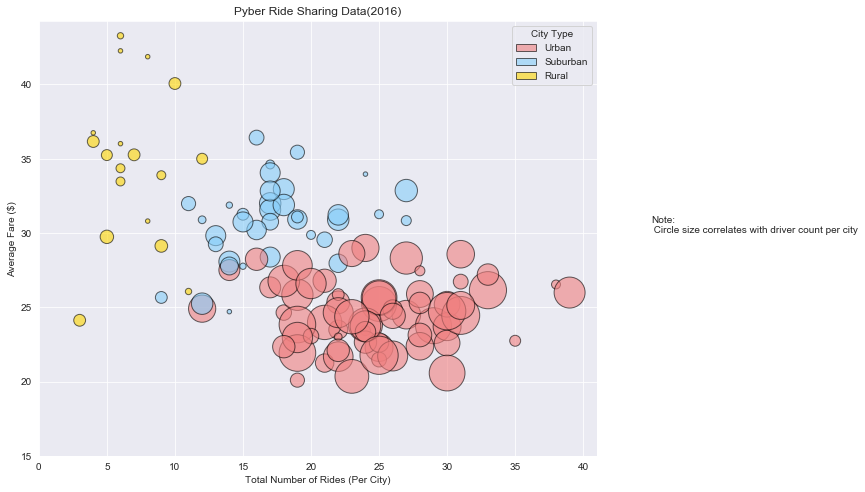

In [172]:
# Obtain the x and y coordinates for each of the three city types
#First, get Average and Total Number of rides, just as the graph shows. For total rides, use count:

# Incorporate the other graph properties
colors={'Urban':'lightcoral', 'Suburban':'lightskyblue','Rural':'gold'}

Counting_Variable=Data_city_ride.groupby(['city']+['type']+['driver_count'])

#Then, get count per city
X_Variable=Counting_Variable['ride_id'].count()

#For average use mean:
Y_Variable=Counting_Variable['fare'].mean()

#Set the dataframe
df=pd.DataFrame({'Y_Variable':Y_Variable,'X_Variable':X_Variable})
df=df.reset_index()

# Build the scatter plots for each city types
#1) To get sizes and general formating for the circles:
fig,ax=plt.subplots(figsize=(10,8))
ax.scatter(df['X_Variable'], df['Y_Variable'], s=df['driver_count']*20, c=df['type'].apply(lambda x:colors[x]),alpha=.6, linewidth=1, edgecolor='black')
#2)In order to get the legend box
ax.legend([A,B,C,],['Urban','Suburban','Rural'],title='City Type')
#3)To get the dark mark around circles:
sns.set_style('darkgrid')
#4)Set limits
ax.set_xlim(0, max(df['X_Variable'])+2)
ax.set_ylim(15, max(df['Y_Variable'])+1)
#Insert general labels and names of axis
ax.set_xlabel("Total Number of Rides (Per City)")
ax.set_ylabel("Average Fare ($)")
ax.set_title("Pyber Ride Sharing Data(2016)")



# Create a legend
import matplotlib.patches as mpatches
A = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightcoral",alpha=.6,edgecolor="black",linewidth=1)
B = mpatches.Circle((0.5, 0.5), 0.1, facecolor="lightskyblue",alpha=.6,edgecolor="black", linewidth=1)
C = mpatches.Circle((0.5, 0.5), 0.1, facecolor="gold",alpha=.6,edgecolor="black", linewidth=1)
#A is for Urban, B is for Suburban C is for Rural

# Incorporate a text label regarding circle size

ax.text(45,30,'Note:\n Circle size correlates with driver count per city')

# Save Figure
plt.savefig('figures/BubblePlot.png')

# Show Figure
plt.show()

## Total Fares by City Type

In [143]:
# Calculate Type Percents
PercentType_ride=Data_city_ride.groupby(['type'])
PercentType_data=city_data_to_load.groupby(['type'])

Total_Fare=PercentType_ride['fare'].sum()
Total_Rides=PercentType_ride['ride_id'].count()
Total_Drivers=PercentType_data['driver_count'].sum()
#Then set results in a dataframe

df1=pd.DataFrame({'TotalFare':Total_Fare,'TotalRides':Total_Rides,'TotalDrivers':Total_Drivers})
df1=df1.reset_index()
df1

,type,TotalFare,TotalRides,TotalDrivers
0,Rural,4327.93,125,78
1,Suburban,19356.33,625,490
2,Urban,39854.38,1625,2405


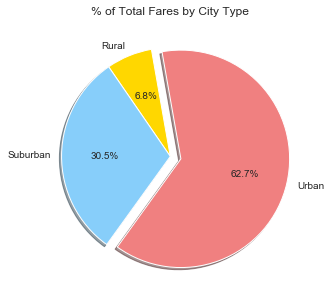

In [154]:
# Build Pie Chart
#Create pie chart according to variables above
sizes=df1['TotalFare']
labels=df1['type']

#Set format
colors=['gold','lightskyblue','lightcoral']
explode=(0,0,0.1)
plt.figure(figsize=(9,5))
plt.pie(sizes,explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=100)

#Get title
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('figures/PieFares.png')

# Show Figure
plt.show()

# Save Figure

## Total Rides by City Type

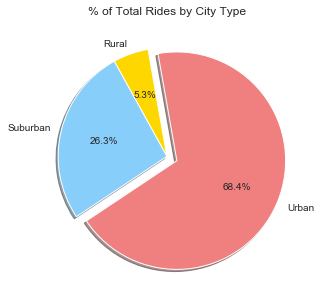

In [153]:
# Build Pie Chart
#Create pie chart according to variables above
sizes=df1['TotalRides']
labels=df1['type']

#Set format
colors=['gold','lightskyblue','lightcoral']
explode=(0,0,0.1)
plt.figure(figsize=(9,5))
plt.pie(sizes,explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=100)

#Get title
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('figures/PieRides.png')

# Show Figure
plt.show()

# Save Figure

## Total Drivers by City Type

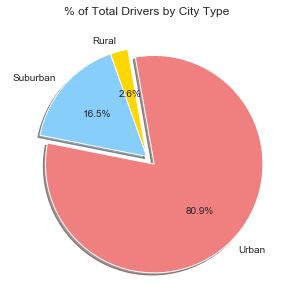

In [152]:
# Build Pie Chart
#Create pie chart according to variables above
sizes=df1['TotalDrivers']
labels=df1['type']

#Set format
colors=['gold','lightskyblue','lightcoral']
explode=(0,0,0.1)
plt.figure(figsize=(9,5))
plt.pie(sizes,explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=100)

#Get title
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('figures/PieDrivers.png')

# Show Figure
plt.show()